일차 단항식 계수 피처 : 
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처 : 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


일차 단항식 계수 feature : 
 [[0 1]
 [2 3]]
삼차 다항식 결정값 : 
 [  5 125]


3차 다항식 계수 feature : 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]


Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
Polynomial 회귀 Shape :  (10,)


Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]



 Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE는 0.40772896250986834 입니다.

 Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.04320874987231747 입니다.

 Degree 15 회귀 계수는 [-2.98295000e+03  1.03899930e+05 -1.87417069e+06  2.03717225e+07
 -1.44873988e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08] 입니다.
Degree 15 MSE는 182815433.47648773 입니다.


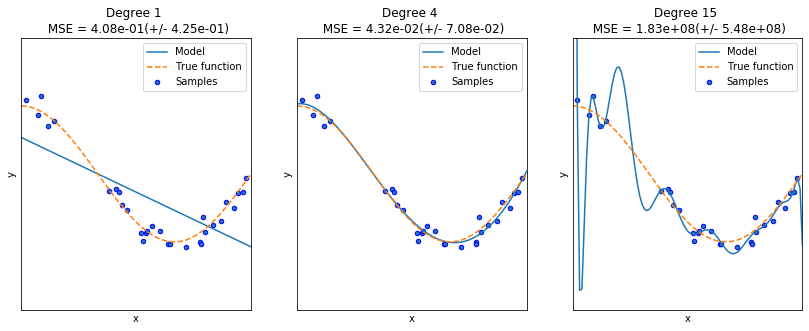

In [20]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
from sklearn.linear_model import LinearRegression



X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처 : \n', X)

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 반환
poly = PolynomialFeatures(degree=2).fit_transform(X)

# [x1, x2] --> [1,x1,x2,x1^2, x1*x2, x2^2]

print('변환된 2차 다항식 계수 피처 : \n', poly)
print('\n')


##############################################################
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature : \n', X)
y = polynomial_func(X)
print('삼차 다항식 결정값 : \n', y)
print('\n')

poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature : \n', poly_ftr)
print('\n')

model = LinearRegression()
model.fit(poly_ftr, y)
print('Polynomial 회귀 계수 \n', np.round(model.coef_, 2))
print('Polynomial 회귀 Shape : ', model.coef_.shape)
print('\n')
###############################################################

# 위의 과정을 pipeline객체를 이용해 작성

from sklearn.pipeline import Pipeline

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

model = Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X, y)

print('Polynomial 회귀 계수 \n', np.round(model.named_steps['linear'].coef_, 2))
print('\n')

# 다항회귀의 차수가 높아질수록 복잡한 다항 관계를 모델링할 수 있다.
# 하지만 차수가 높아짐에 따라 학습 데이터에 과적합 문제가 발생한다.

# 사이킷런 홈페이지의 다항 회귀를 이용한 과소적합과 과적합의 문제의 예시
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
%matplotlib inline

# 코사인 값으로 변경하는 함수
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

y = true_fun(X) + np.random.randn(n_samples) * 0.1



plt.figure(figsize=(14,5))
degrees = [1,4,15]

# 다항 회귀의 차수를 1,4,15로 각각 변화시키면서 비교.
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
#     개별 degree 별로 polynomial 변환.
    polynomial_features = PolynomialFeatures(degree = degrees[i], include_bias = False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([('poly', polynomial_features), ('linear', linear_regression)])
    pipeline.fit(X.reshape(-1,1), y)
    
#     교차 검증
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring='neg_mean_squared_error', cv= 10)
    
    coefficients = pipeline.named_steps['linear'].coef_
    print('\n Degree {} 회귀 계수는 {} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {} MSE는 {} 입니다.'.format(degrees[i], -1*np.mean(scores)))
    
#     0부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행 (linspace 이용)
    X_test = np.linspace(0,1,100)
    plt.plot(X_test, pipeline.predict(X_test[:,np.newaxis]), label = "Model")
    plt.plot(X_test, true_fun(X_test), '--', label='True function')
    plt.scatter(X,y, edgecolor = 'b', s=20, label = "Samples")
    
    plt.xlabel("x")
    plt.ylabel('y')
    plt.xlim((0,1))
    plt.ylim((-2,2))
    plt.legend(loc="best")
    plt.title("Degree {} \n MSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()
    
    
    
    